## FGV QUANT
## Alunos: Thalles Rezende e Vitor Gothardo

# Reversão à média- (Pairs Trading)

Long Pair: Long ação A e short ação B

Short Pair: Short ação A and long ação B

Você deseja encontrar uma alta correlação entre o preço das ações A e B (geralmente > 0,8) - neste caso, digamos 0,9. Se você encontrar uma relação sugerindo que os preços se movem em direções opostas, você pode capitalizar esse comportamento. UMA VEZ que os ativos se desviam de sua correlação típica, digamos 0,5, você pode comprar / vender o par, pois espera que a correlação convirja de volta à sua forma original.

Meio que se torna uma arte quando você tenta maximizar o spread entre o ativo

## Ideia Principal

1) Encontre 2 ativos que se movem de forma semelhante entre si (seja uma correlação negativa ou positiva)

2) Vender a ação 'sobrevalorizada' e comprar a ação 'subvalorizada' -- Um sinal comum a ser usado para acionar a compra de uma negociação de pares é usar o Índice de Preço (Ação A / Ação B). Se a proporção mudar significativamente, você saberá que é hora de negociar. 'Significância' pode ser medida com desvio padrão.

In [1]:
# Obtendo dados de 6 anos atrás
# Usaremos o 1 ano mais recente para determinar o quão bem teríamos nos saído se seguissemos a fronteira eficiente.
# O mercado está aberto 252 vezes em um determinado ano - 252 dias úteis.
# Obteremos o fechamento ajustado como nossos dados principais.

'''========================================================================= ATUALIZADO 04/23/2022 ================================
Tenha certeza de que seu pandas == 1.2 version.
O Yahoo mudou sua estrutura quando se trata de consultar dados. Fizemos os ajustes em todo este notebook.
========================================================================= ATUALIZADO 04/23/2022  ==================================
'''
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

def get_historical_Data(tickers):
    """Esta função retorna um dataframe pd com todas as informações de fechamento ajustadas"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2021, 4, 22), end=datetime(2022, 4 , 22)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ["TSLA", "RIVN","DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT","TWTR","GS","XOM","NKE", "FB","BRK-B", "MSFT"] #Nome da empresa (Dominos pizza)
d = get_historical_Data(ticks)
print(d.shape)
# Dados mais recentes
d.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,TSLA,RIVN,DPZ,AAPL,GOOG,AMD,GME,SPY,NFLX,BA,WMT,TWTR,GS,XOM,NKE,FB,BRK-B,MSFT
Date,,,,,,,,,,,,,,,,,,
2022-04-14,985.000000,40.590000,387.239990,165.289993,2545.060059,93.059998,150.770004,437.790009,341.130005,181.940002,157.080002,45.080002,321.640015,87.830002,133.460007,210.179993,344.329987,279.829987
2022-04-18,1004.289978,38.230000,379.489990,165.070007,2559.219971,93.889999,141.460007,437.970001,337.859985,179.850006,155.880005,48.450001,329.880005,88.550003,131.630005,210.770004,346.649994,280.519989
2022-04-19,1028.150024,39.150002,394.079987,167.399994,2610.620117,96.930000,152.470001,445.040009,348.609985,185.979996,157.649994,46.160000,335.950012,87.760002,137.050003,217.309998,348.500000,285.299988
2022-04-20,977.200012,36.230000,396.489990,167.229996,2564.909912,94.019997,148.850006,444.709991,226.190002,183.550003,159.630005,46.720001,341.059998,87.959999,135.869995,200.419998,348.820007,286.359985
2022-04-21,1008.780029,33.759998,391.000000,166.419998,2498.750000,89.849998,141.559998,438.059998,218.220001,181.020004,159.869995,47.080002,334.299988,87.029999,135.460007,188.070007,343.600006,280.809998


In [2]:
d['TSLA'].rolling(20).mean()

Date
2021-04-22            NaN
2021-04-23            NaN
2021-04-26            NaN
2021-04-27            NaN
2021-04-28            NaN
                 ...     
2022-04-14    1031.362988
2022-04-18    1036.307986
2022-04-19    1041.657489
2022-04-20    1040.818491
2022-04-21    1041.301993
Name: TSLA, Length: 253, dtype: float64

In [3]:
corr_matrix = d.corr()
corr_matrix

,TSLA,RIVN,DPZ,AAPL,GOOG,AMD,GME,SPY,NFLX,BA,WMT,TWTR,GS,XOM,NKE,FB,BRK-B,MSFT
TSLA,1.000000,0.509434,0.164387,0.778226,0.665597,0.836502,-0.266183,0.845184,0.139373,-0.604112,0.392810,-0.584694,0.106558,0.487389,0.277885,-0.289635,0.462472,0.845323
RIVN,0.509434,1.000000,0.917559,-0.088109,0.789606,0.913236,0.670686,0.710782,0.957021,0.637323,-0.276920,0.553937,0.888465,-0.910988,0.945517,0.847008,-0.874936,0.884978
DPZ,0.164387,0.917559,1.000000,0.136504,0.639833,0.538615,0.268672,0.555133,0.761143,0.187402,0.014552,0.318450,0.779532,-0.611559,0.903757,0.747087,-0.563011,0.554462
AAPL,0.778226,-0.088109,0.136504,1.000000,0.631490,0.733838,-0.578018,0.783586,-0.202315,-0.752053,0.286726,-0.690141,-0.084538,0.612926,0.188755,-0.423810,0.638652,0.761060
GOOG,0.665597,0.789606,0.639833,0.631490,1.000000,0.832450,-0.005821,0.893808,0.476049,-0.362879,0.335109,-0.131374,0.575547,0.030079,0.706121,0.191006,0.048040,0.926042
AMD,0.836502,0.913236,0.538615,0.733838,0.832450,1.000000,-0.206737,0.905148,0.385009,-0.437885,0.168976,-0.465290,0.398088,0.184290,0.582023,-0.005274,0.155807,0.942433
GME,-0.266183,0.670686,0.268672,-0.578018,-0.005821,-0.206737,1.000000,-0.131849,0.535009,0.620564,0.016223,0.657581,0.461549,-0.600110,0.242554,0.596181,-0.573919,-0.165295
SPY,0.845184,0.710782,0.555133,0.783586,0.893808,0.905148,-0.131849,1.000000,0.366289,-0.426328,0.412512,-0.332239,0.457685,0.185539,0.622271,0.076621,0.244581,0.950793
NFLX,0.139373,0.957021,0.761143,-0.202315,0.476049,0.385009,0.535009,0.366289,1.000000,0.380720,-0.059700,0.471271,0.828736,-0.722390,0.737276,0.780999,-0.734966,0.401374
BA,-0.604112,0.637323,0.187402,-0.752053,-0.362879,-0.437885,0.620564,-0.426328,0.380720,1.000000,-0.395779,0.673742,0.355153,-0.690197,0.109475,0.636841,-0.692304,-0.506092


<AxesSubplot:>

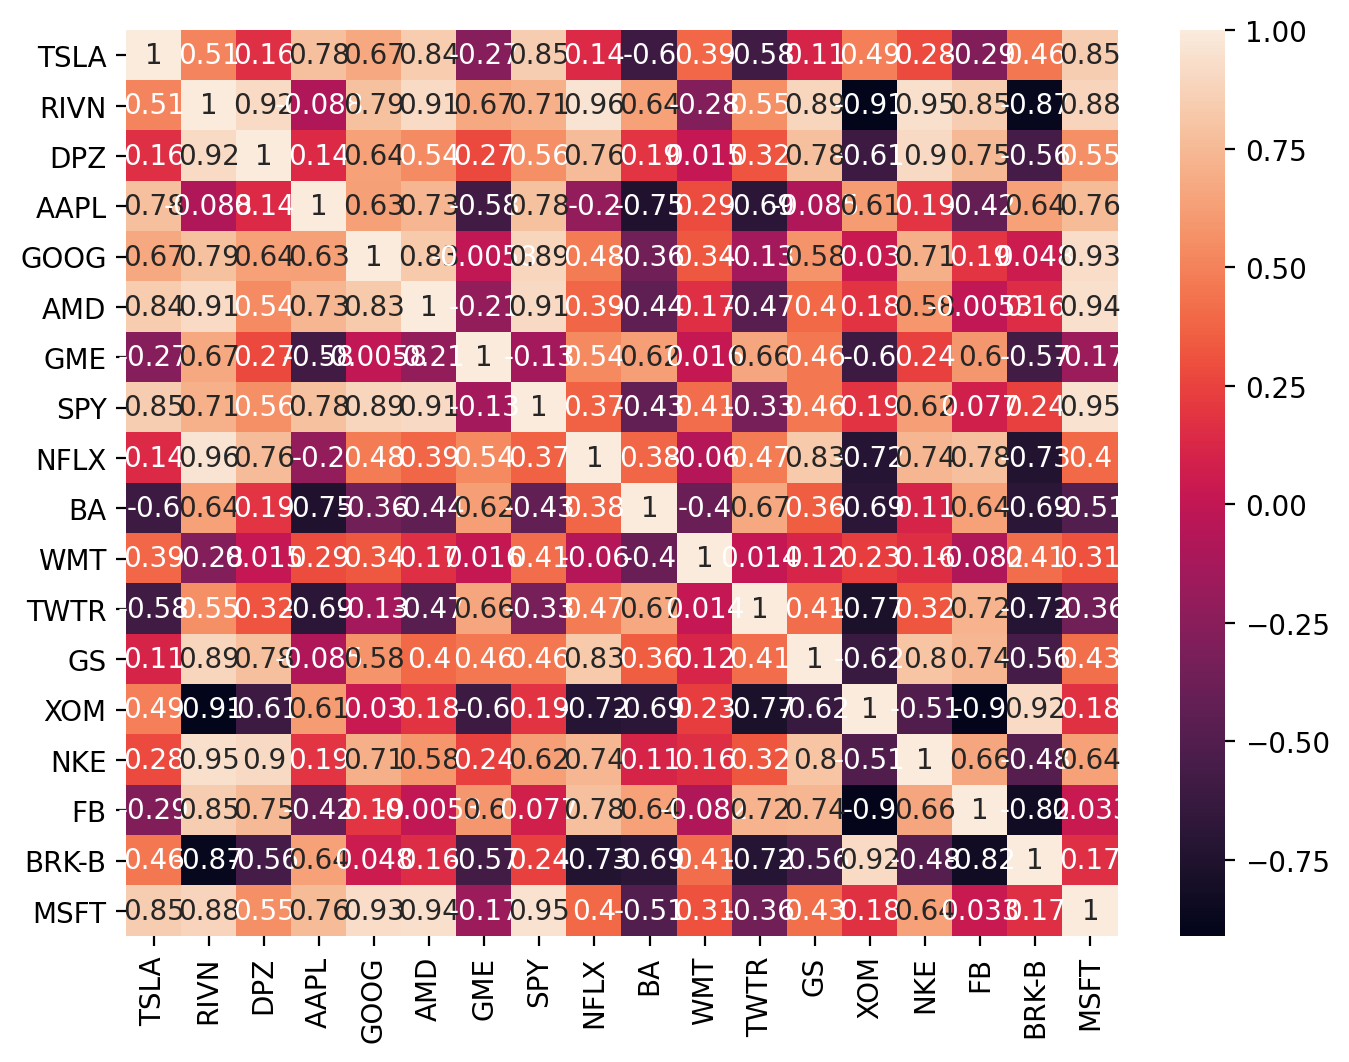

In [4]:
# Vamos mapear essa matriz para que possamos ter uma noção melhor do que está acontecendo
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=200)
sn.heatmap(corr_matrix, annot = True)

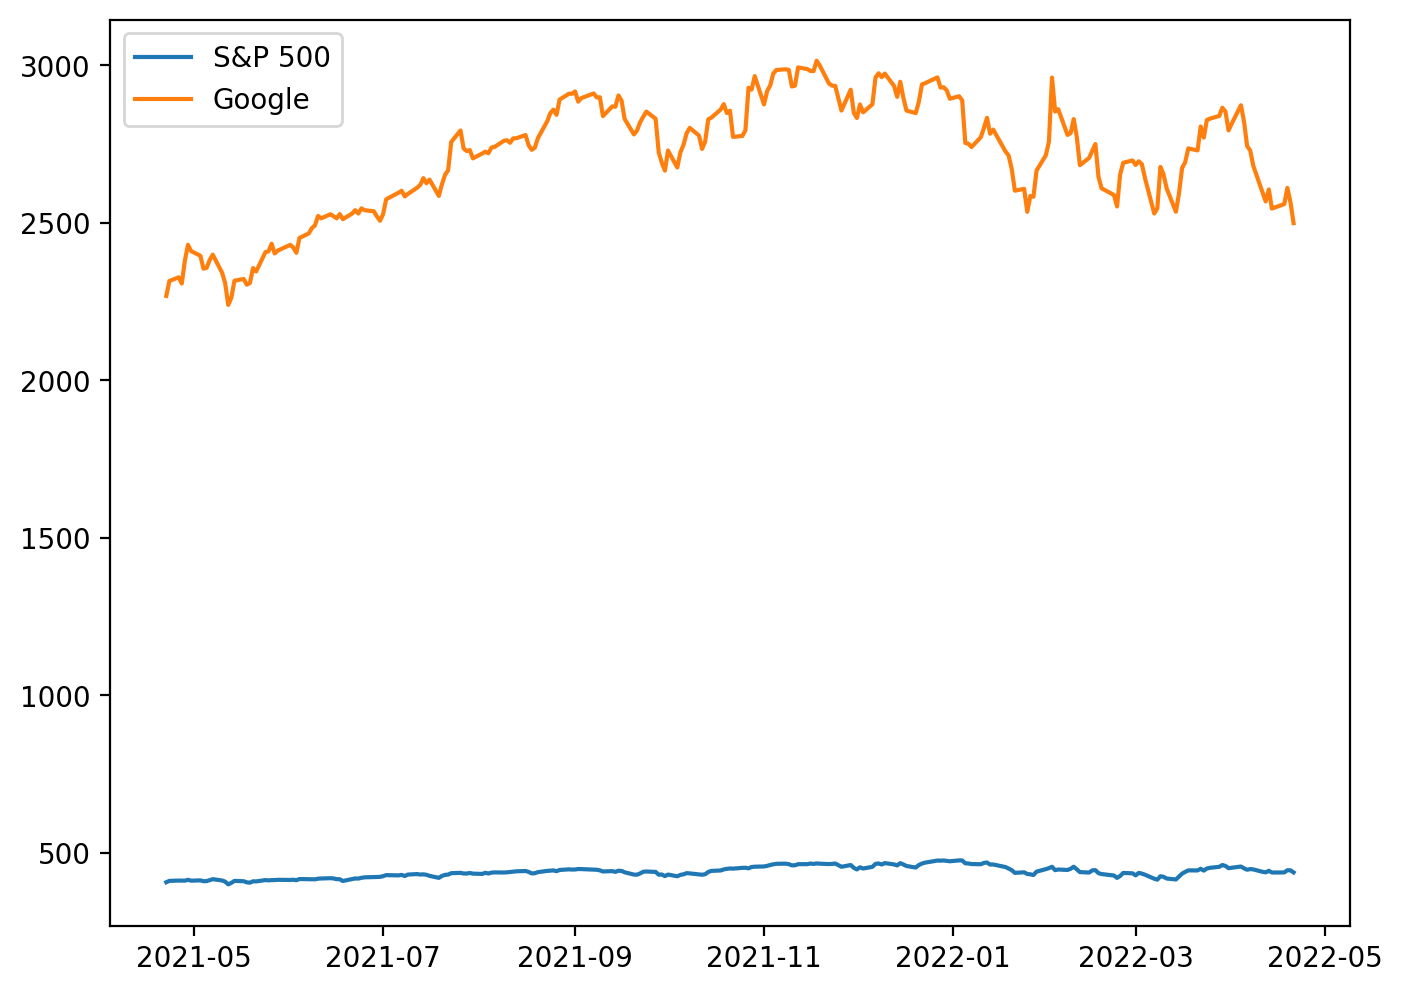

In [5]:
import matplotlib.pyplot as plt
figure(figsize=(8, 6), dpi=200)
SPY = d['SPY'] # S&P 500
GOOG = d['GOOG'] # Berkshire Class A share
# NO ENTANTO, vamos verificar a relação entre as ações...
plt.plot(SPY, label = "S&P 500")
plt.plot(GOOG, label = "Google")
plt.legend()
# oh... é por isso que a correlação parece muito alta. Os dados não são 'padronizados'.
# Vamos ver um diferente...

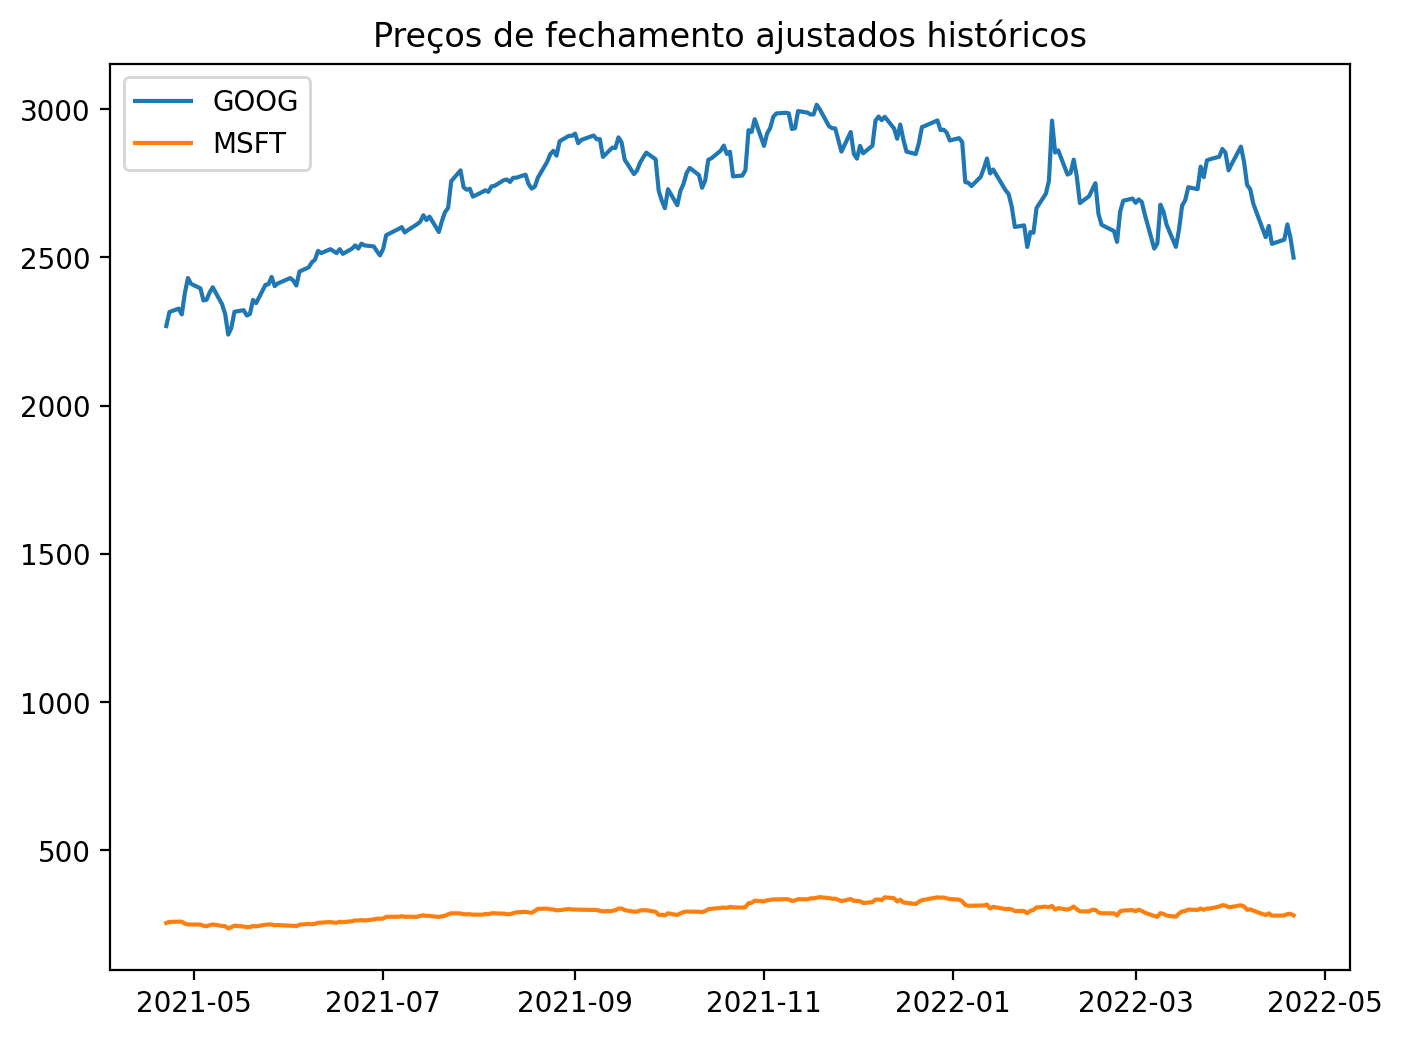

In [6]:
#temos uma correlação entre GOOG e MSFT ~ 0.93
figure(figsize=(8, 6), dpi=200)
GOOG = d['GOOG']
MSFT = d['MSFT']
plt.plot(GOOG, label = "GOOG")
plt.plot(MSFT, label = "MSFT")
plt.title('Preços de fechamento ajustados históricos')
plt.legend()
# Mais razoável.

Text(0.5, 1.0, 'Spread entre GOOG e MSFT')

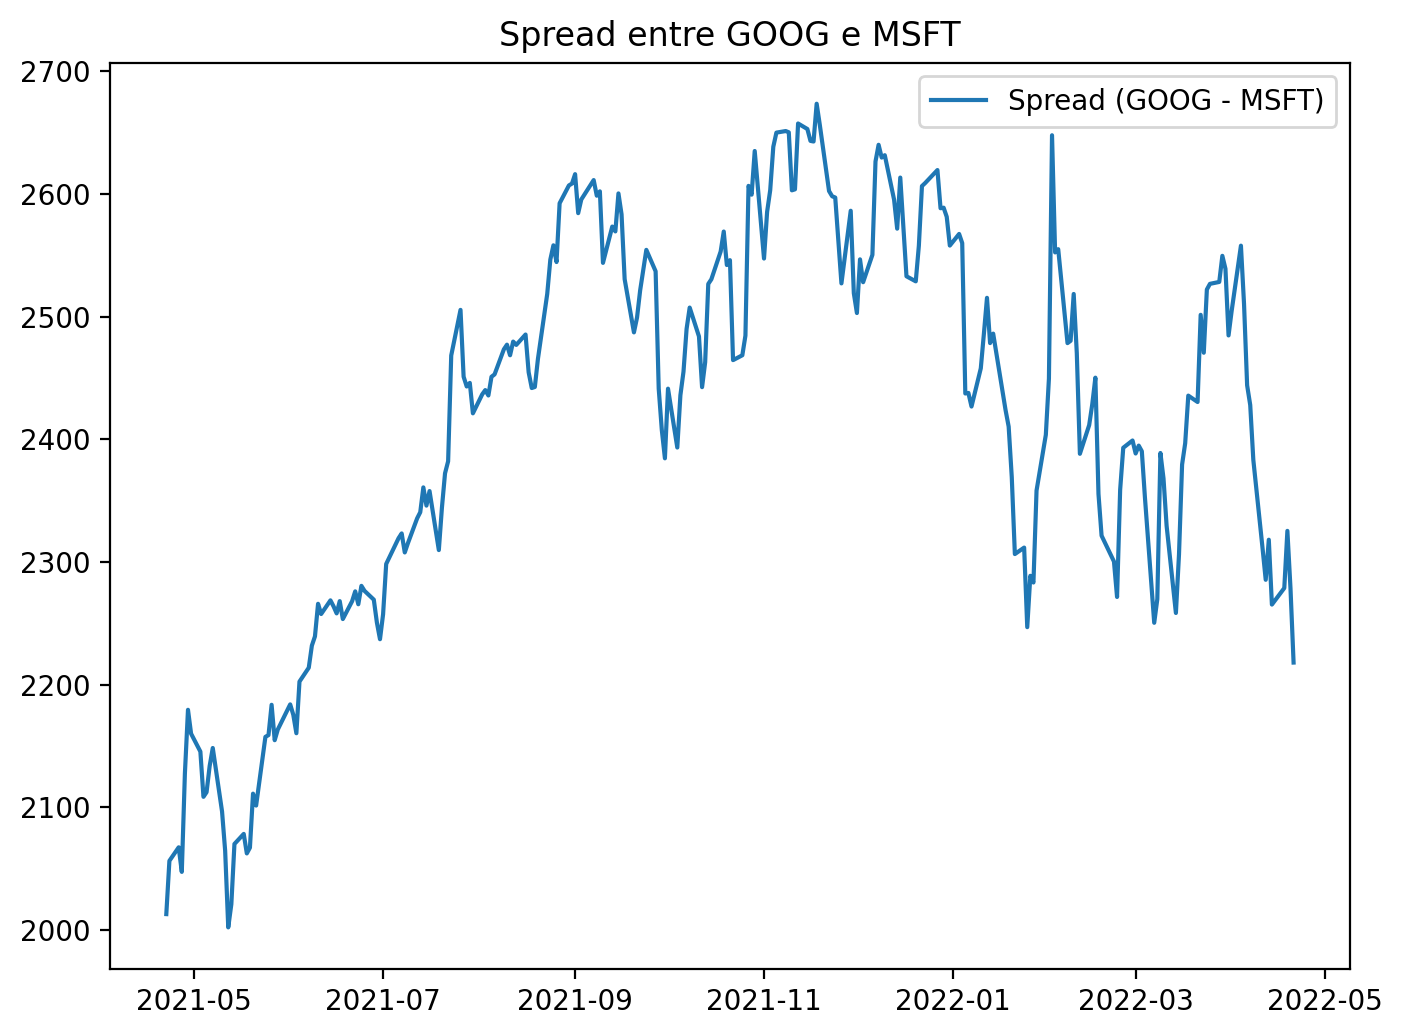

In [7]:
# plote o spread
figure(figsize=(8, 6), dpi=200)
plt.plot(GOOG - MSFT, label = 'Spread (GOOG - MSFT)')
plt.legend()
plt.title("Spread entre GOOG e MSFT")

In [8]:
# Confira o valor de cointegração: Null hyp. = sem cointegração
import statsmodels.tsa.stattools as ts 
result = ts.coint(GOOG, MSFT)

In [9]:
# Teste de cointegração: Uma técnica usada para encontrar uma correlação potencial em uma série temporal (longo prazo)
# Determina se o spread entre os dois ativos é constante ao longo do tempo.
# Hipótese nula: Os spreads entre as séries são não estacionários.
# Usa o teste de cointegração de duas etapas de Engle-Granger aumentado.
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('Queremos P val < 0.05 (significando que a cointegração existe))')
print('O valor P para o teste de cointegração em duas etapas de Engle-Granger aumentado é', p_val)

Queremos P val < 0.05 (significando que a cointegração existe))
O valor P para o teste de cointegração em duas etapas de Engle-Granger aumentado é 0.019368743135644812


In [10]:
from statsmodels.tsa.stattools import adfuller
# Calcular o teste ADF para Berkshire Hathaway e Microsoft
# Com todas as séries temporais, você deseja ter dados estacionários, caso contrário, nossos dados serão muito difíceis de prever.
# ADF para Berkshire Hathaway Classe B
GOOG_ADF = adfuller(GOOG)
print('O valor P para o Teste Dickey-Fuller Aumentado é', GOOG_ADF[1])
MSFT_ADF = adfuller(MSFT)
print('O valor P para o Teste Dickey-Fuller Aumentado é', MSFT_ADF[1])
Spread_ADF = adfuller(GOOG - MSFT)
print('O valor P para o Teste Dickey-Fuller Aumentado é', Spread_ADF[1])
Ratio_ADF = adfuller(GOOG / MSFT)
print('O valor P para o Teste Dickey-Fuller Aumentado é', Ratio_ADF[1])
# Spread parece bom. Se você deseja resultados ainda melhores, considere a diferença (ordem 1) de Berkshire e MSFT

# Resultados: só pode reivindicar estacionário para o spread (desde P valor < 0,05). Isso sugere uma média constante ao longo do tempo.
# Portanto, as duas séries são cointegradas.

O valor P para o Teste Dickey-Fuller Aumentado é 0.12273315328333301
O valor P para o Teste Dickey-Fuller Aumentado é 0.4336289570036356
O valor P para o Teste Dickey-Fuller Aumentado é 0.09318025821362108
O valor P para o Teste Dickey-Fuller Aumentado é 0.22964066146717604


Text(0.5, 1.0, 'Relação de preço entre GOOG e MSFT')

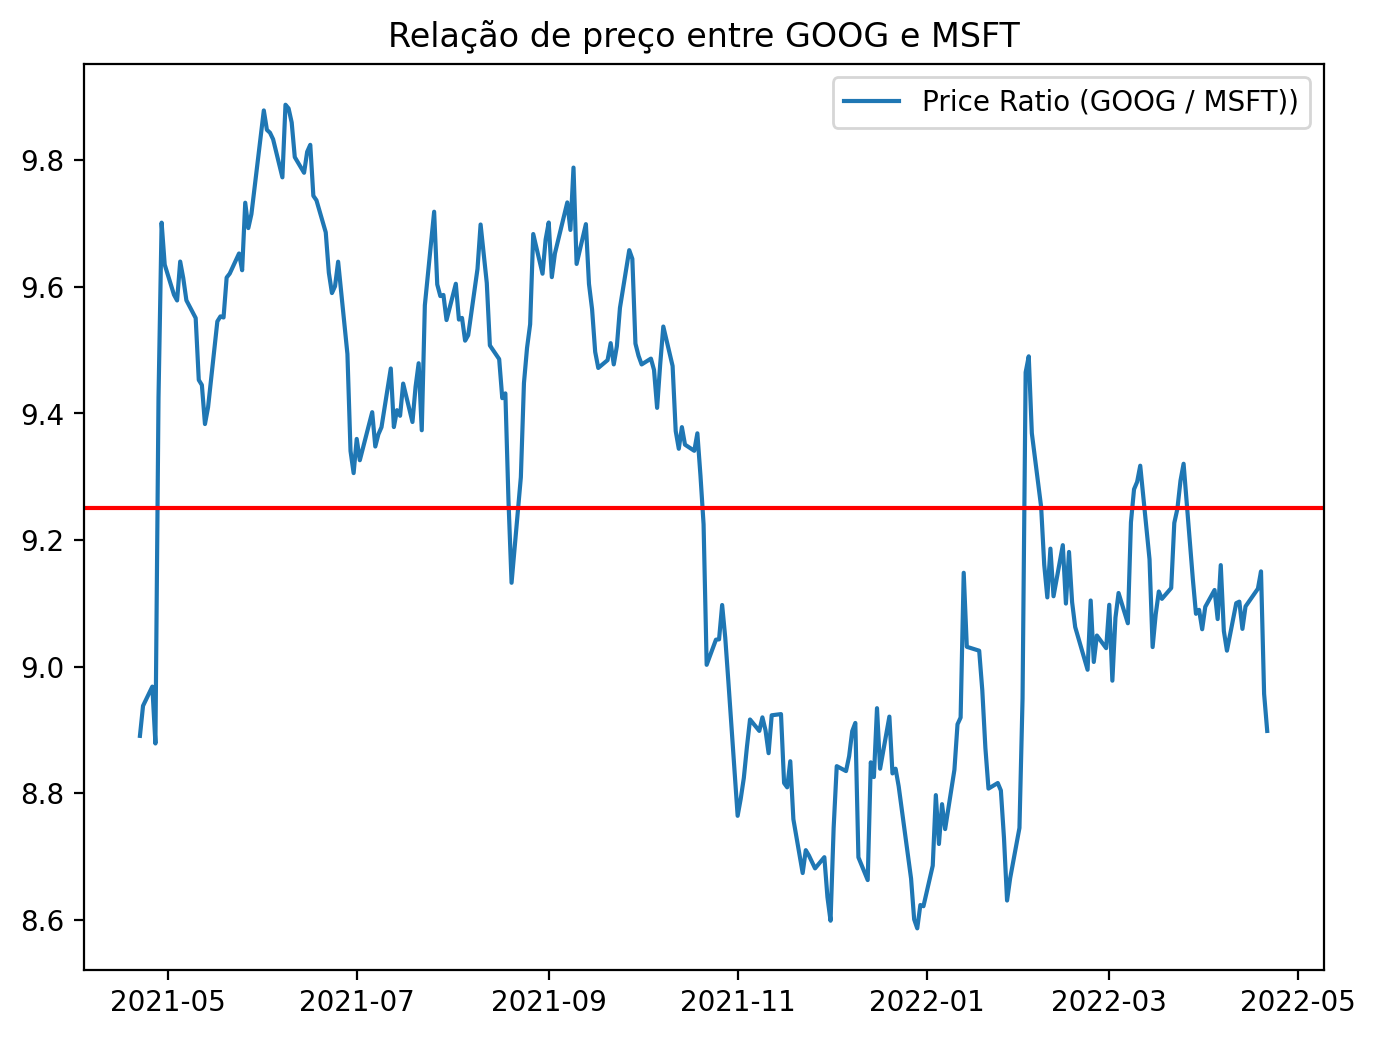

In [11]:
# Além disso, podemos dar uma olhada nas relações de preços entre as duas séries temporais.
figure(figsize=(8, 6), dpi=200)
ratio = GOOG / MSFT
plt.plot(ratio, label = 'Price Ratio (GOOG / MSFT))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Relação de preço entre GOOG e MSFT")

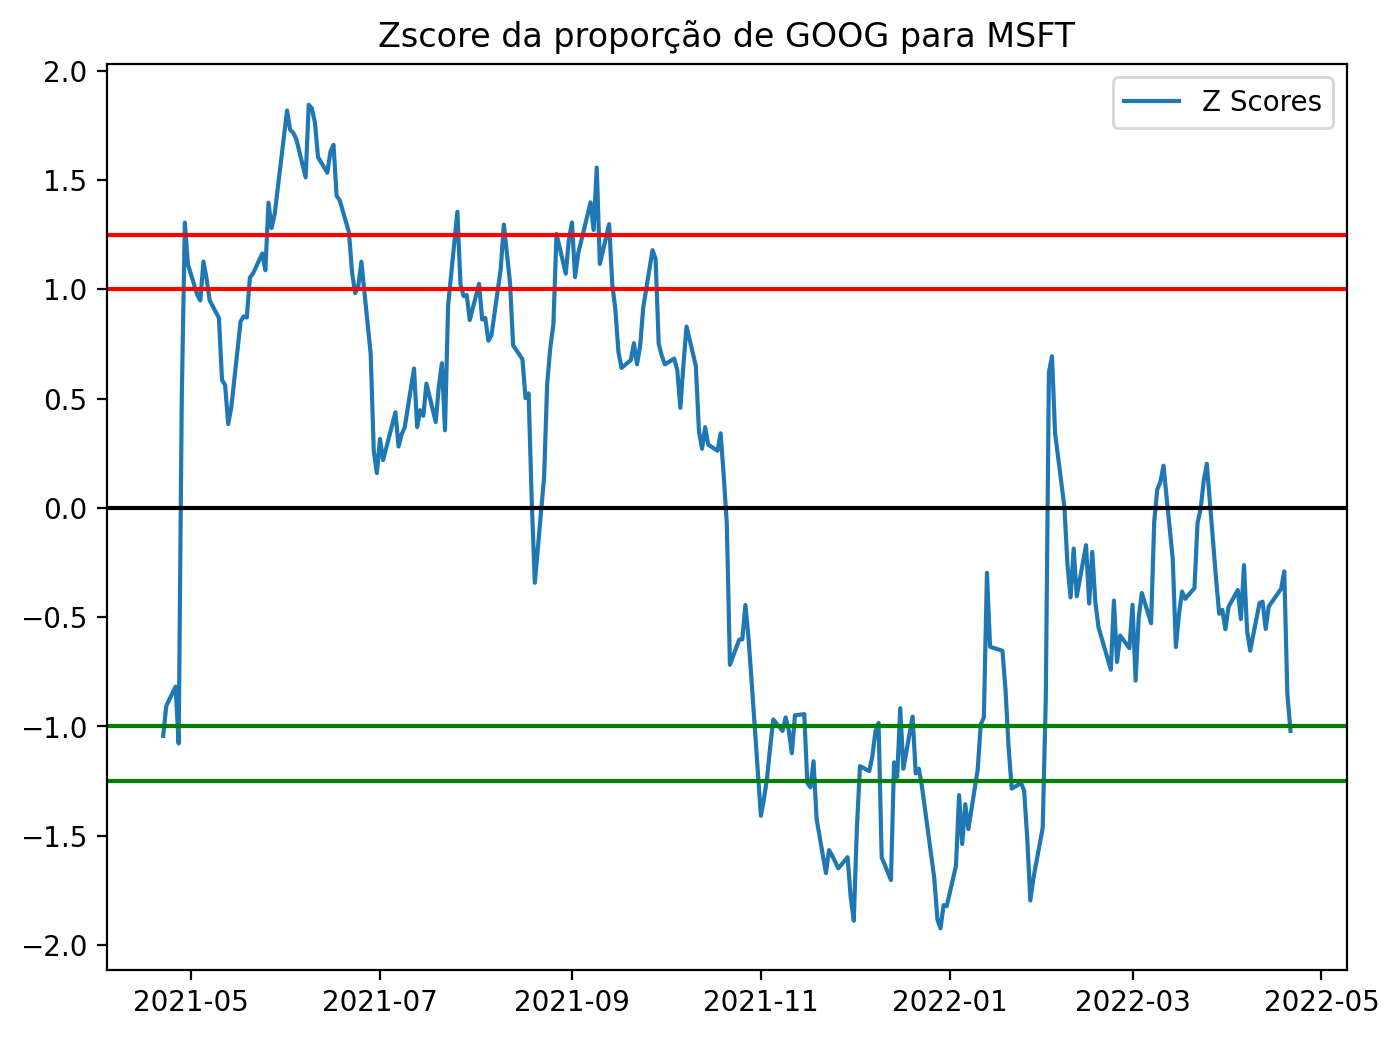

In [12]:
# OBSERVAÇÃO, aqui você pode usar o spread OU a abordagem da relação de preço. De qualquer forma, vamos padronizar a proporção para que possamos ter um
# limite superior e inferior para ajudar a avaliar nossas tendências. Vamos ficar com os dados de proporção.
figure(figsize=(8, 6), dpi=200)
# Calcule os Zscores de cada linha.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Definir os limites superior e inferior para serem a pontuação z de 1 e -1 (1/-1 desvio padrão)
plt.axhline(1.25, color='red') # 95% dos nossos dados estarão entre esses limites.
plt.axhline(-1.0, color='green') # 68% dos nossos dados estarão entre esses limites.
plt.axhline(-1.25, color='green') # 95% dos nossos dados estarão entre esses limites.
plt.legend(loc = 'best')
plt.title('Zscore da proporção de GOOG para MSFT')
plt.show()
# Na maioria das vezes, o intervalo que existe fora dessas 'bandas' deve convergir de volta para a média. Assim, você pode
# determinar quando você pode comprar ou vender o par (BRK_B para MSFT).

In [13]:
# Isso é legal .. então quando nós realmente começamos a negociar? Precisamos de alguma forma de 'sinal' para negociar (e negociar)
# Este é o lugar onde ele pode se tornar uma 'forma de arte' E um jogo de probabilidade.

In [14]:
# Você pode dividir 80/20 para treinar e testar, MAS não faremos backtesting, pois estamos apenas analisando o modelo.
# train = ratio[0:round(0.8*len(ratio))]
# teste = proporção[round(0,8*len(proporção)):]
# print('As divisões conferem?',len(train) + len(teste) == len(proporção))

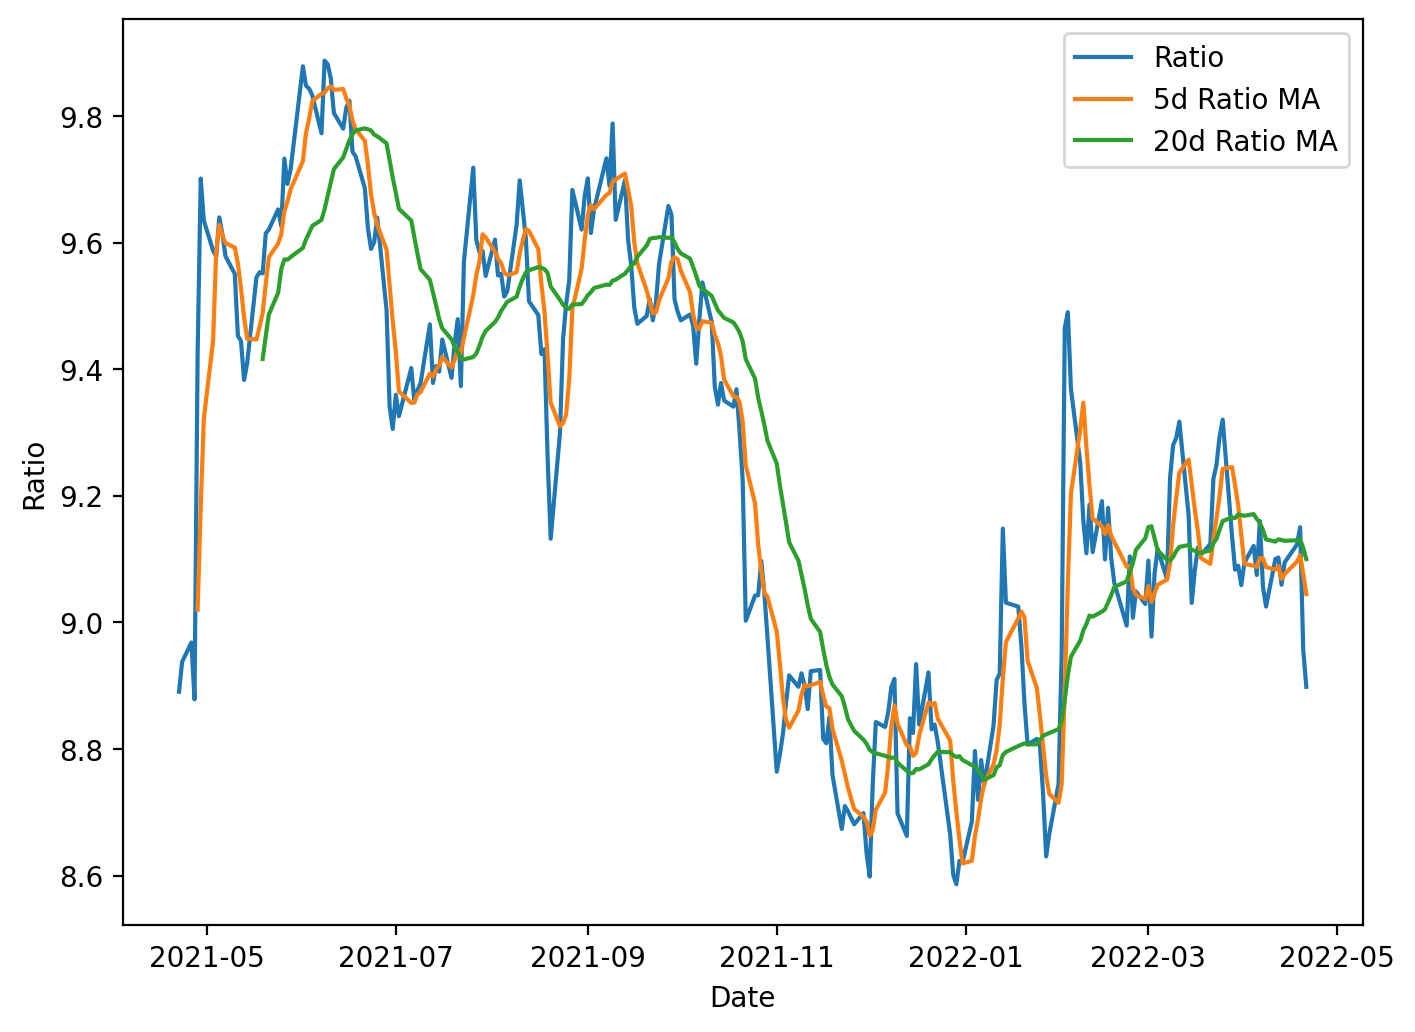

In [15]:
figure(figsize=(8, 6), dpi=200)
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.show()

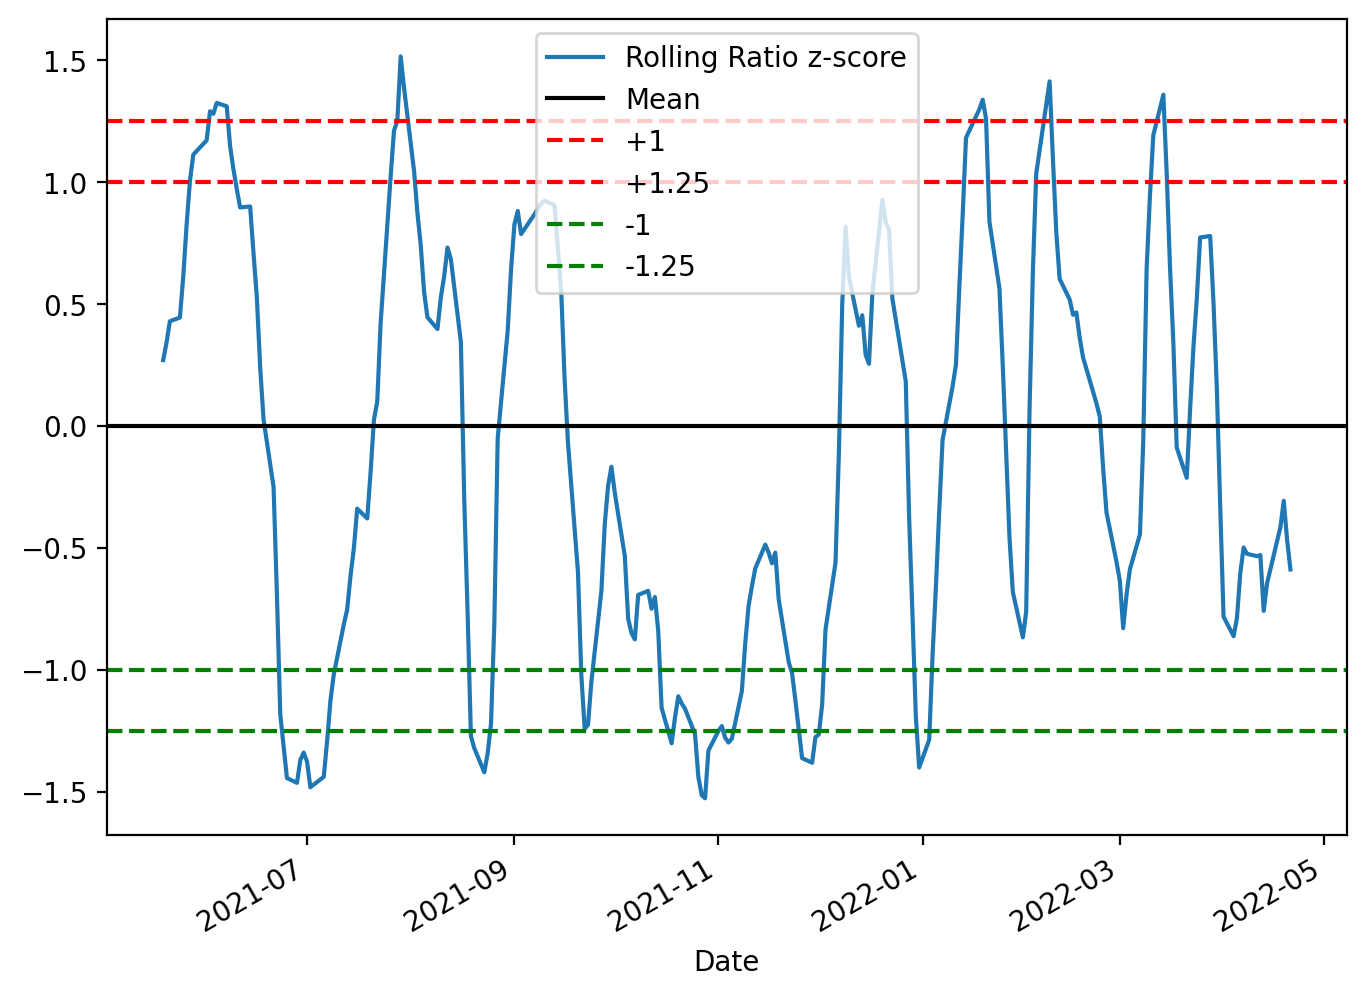

In [16]:
figure(figsize=(8, 6), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

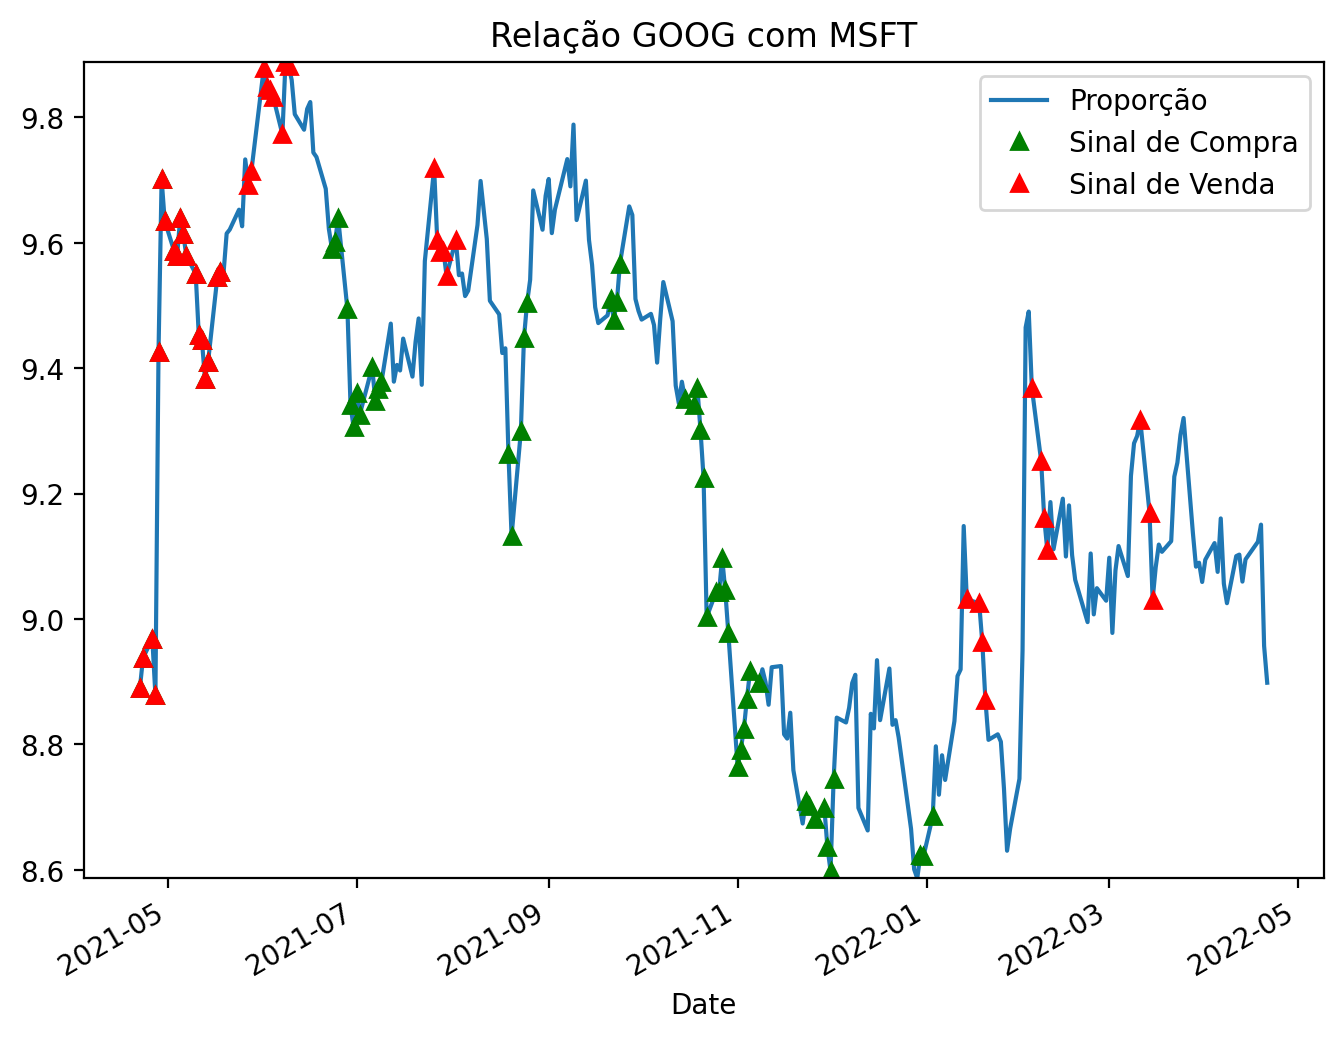

In [17]:
figure(figsize=(8, 6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Proporção', 'Sinal de Compra', 'Sinal de Venda'])
plt.title('Relação GOOG com MSFT')
plt.show()

In [18]:
buy

Date
2021-04-22    8.890590
2021-04-23    8.938002
2021-04-26    8.968428
2021-04-27    8.878546
2021-04-28    9.425264
                ...   
2022-04-14    0.000000
2022-04-18    0.000000
2022-04-19    0.000000
2022-04-20    0.000000
2022-04-21    0.000000
Length: 253, dtype: float64

# referências

MIT License  
Spencerpao
QUANT Strategy: Pairs Trading Algorithm (Mean Reversion). [S. l.: s. n.], 2021. Disponível em: https://www.youtube.com/watch?v=f73ItMWO4z8&t=6s. Acesso em: 17 abr. 2022.